In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image  # Para carregar imagens

In [263]:
### Funções

def plot_image(image_path, cmap=None):
    """
    Função para plotar uma imagem a partir de um caminho.
    """
    img = Image.open(image_path)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [264]:
# Puxando base.parquet
df = pd.read_parquet('datasets/base.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 765
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   file_path            766 non-null    object
 1   id_produto           766 non-null    object
 2   grupo_produto        766 non-null    object
 3   file_name            766 non-null    object
 4   link                 766 non-null    object
 5   PRODUTOS             766 non-null    object
 6   CARACTERISTICAS      766 non-null    object
 7   LOCALIZACAO_ESTAMPA  766 non-null    object
 8   COR_PREDOMINANTE     766 non-null    object
 9   DECOTE_OU_GOLA       515 non-null    object
 10  COMPRIMENTO_SAIA     216 non-null    object
 11  AMARRACAO            748 non-null    object
 12  ZOOM_ESTAMPA         766 non-null    object
 13  COMPRIMENTO_MANGA    533 non-null    object
 14  ESTILO               766 non-null    object
 15  TIPO_MANGA           533 non-null    object
 16  TIPO_CIN

In [265]:
df.sample(3)

,file_path,id_produto,grupo_produto,file_name,link,PRODUTOS,CARACTERISTICAS,LOCALIZACAO_ESTAMPA,COR_PREDOMINANTE,DECOTE_OU_GOLA,...,ESTILO,TIPO_MANGA,TIPO_CINTURA,COMPRIMENTO,MODELAGEM,ESTAMPA,FENDA_PERNA,MODELAGEM_SAIA,TIPO_BARRA,desc_produto
738,animale_images_cropped/vestido/vestido_vestido...,07-20-6779-0005,vestido,vestido_vestido-midi-de-tricot-com-textura_pre...,https://animaleproductsimages.s3.us-east-1.ama...,07-20-6779-0005,{COMPRIMENTO_SAIA: MEIO_CALCANHAR;COMPRIMENTO_...,N/A,PRETO,V,...,BASICO,N/A,None,None,None,SEM_ESTAMPA,N/A,REGULAR,None,vestido midi de tricot com textura
388,animale_images_cropped/blusa/top-blusa_regata-...,52-15-1379-5476,blusa,top-blusa_regata-de-tricot-bicolor-listrada-co...,https://animaleproductsimages.s3.us-east-1.ama...,52-15-1379-5476,{COMPRIMENTO: CURTA;MODELAGEM: AJUSTADA;COMPRI...,ROUPA_INTEIRA,VERDE,V,...,CASUAL,N/A,None,CURTA,AJUSTADA,LISTRADO_HORIZONTAL,None,None,None,regata de tricot bicolor listrada com lurex
89,animale_images_cropped/calca/calca_calca-de-ge...,25-34-1678-09253,calca,calca_calca-de-georgette-pala-larga-verde-bols...,https://animaleproductsimages.s3.us-east-1.ama...,25-34-1678-09253,{COMPRIMENTO: MEIO_CANELA;TIPO_CINTURA: MEDIA;...,N/A,VERDE,None,...,CASUAL,None,MEDIA,MEIO_CANELA,SOLTA,SEM_ESTAMPA,N/A,None,AJUSTADA,calca de georgette pala larga verde bolso faca


### Definindo sample para teste

In [266]:
# Sample 10 blusas vermelhas
sample_camisetas_10 = df[(df['COR_PREDOMINANTE'] == 'VERDE') & (df['grupo_produto'] == 'blusa')].sample(10)

In [267]:
# Adicionar 52-06-0723-04331 ao sample
sample_camisetas_10 = sample_camisetas_10.append(df[df['id_produto'] == '52-06-0723-04331'])
sample_camisetas_10 = sample_camisetas_10.append(df[df['id_produto'] == '52-06-0713-0005'])

C:\Users\Cole\AppData\Local\Temp\ipykernel_19676\4292093422.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_camisetas_10 = sample_camisetas_10.append(df[df['id_produto'] == '52-06-0723-04331'])
C:\Users\Cole\AppData\Local\Temp\ipykernel_19676\4292093422.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_camisetas_10 = sample_camisetas_10.append(df[df['id_produto'] == '52-06-0713-0005'])


In [268]:
sample_camisetas_10.shape

(12, 24)

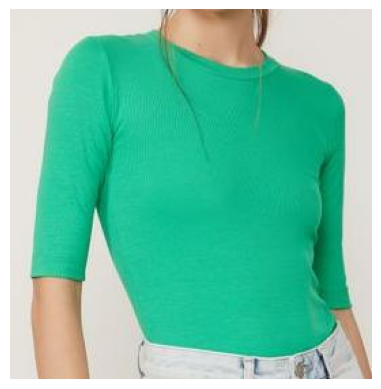

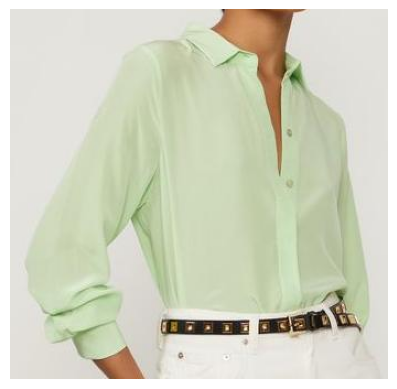

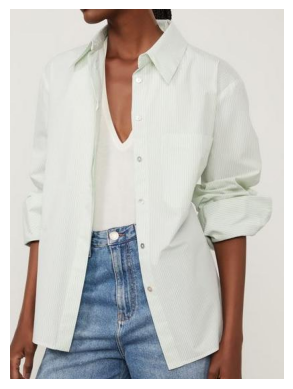

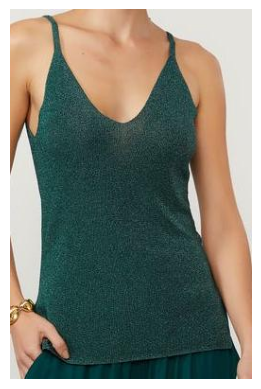

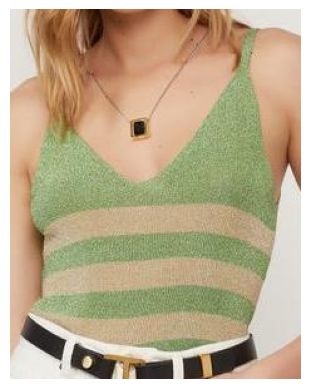

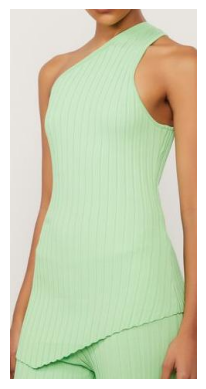

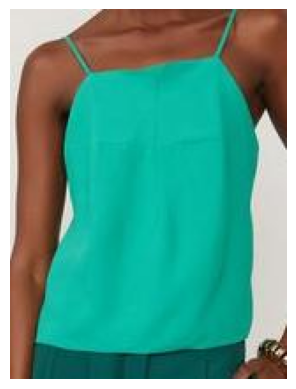

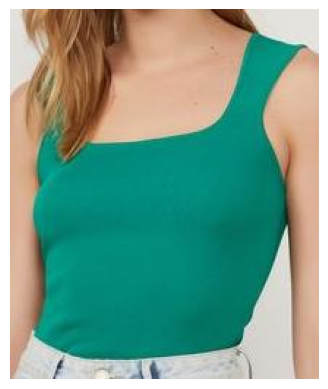

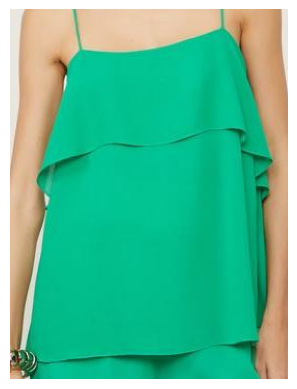

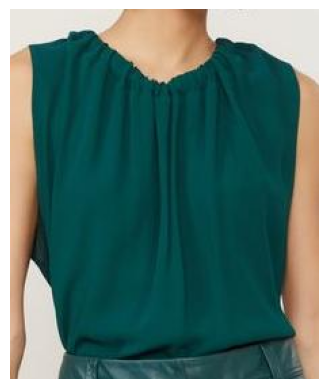

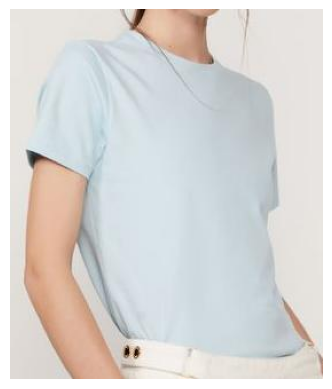

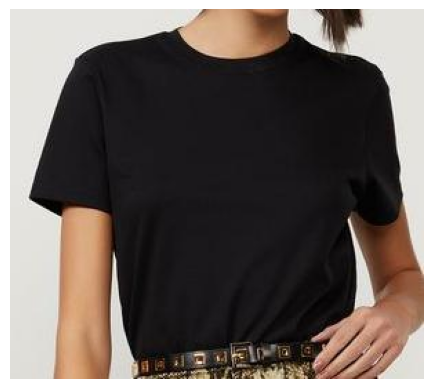

In [269]:
for i in range(len(sample_camisetas_10)):
    plot_image(sample_camisetas_10.iloc[i]['file_path'])

In [270]:
# Carregando embeddings
df_embs = pd.read_parquet('datasets/img_embeddings.parquet')

In [271]:
sample_camisetas = pd.merge(sample_camisetas_10, df_embs, on='id_produto', how='left')

In [272]:
sample_camisetas.sample(3)

,file_path,id_produto,grupo_produto,file_name,link,PRODUTOS,CARACTERISTICAS,LOCALIZACAO_ESTAMPA,COR_PREDOMINANTE,DECOTE_OU_GOLA,...,emb_img_502,emb_img_503,emb_img_504,emb_img_505,emb_img_506,emb_img_507,emb_img_508,emb_img_509,emb_img_510,emb_img_511
11,animale_images_cropped/blusa/top-blusa_camiset...,52-06-0713-0005,blusa,top-blusa_camiseta-slim_preto_52-06-0713-0005.jpg,https://animaleproductsimages.s3.us-east-1.ama...,52-06-0713-0005,{COMPRIMENTO: CURTA; MODELAGEM: SOLTA; COMPRIM...,N/A,PRETO,REDONDA,...,-0.027923,-0.385747,0.390242,0.245555,-0.197278,-0.138561,-0.133042,0.402046,0.033731,0.457460
5,animale_images_cropped/blusa/top-blusa_blusa-d...,52-13-5563-04113,blusa,top-blusa_blusa-de-tricot-maxi-canelado-um-omb...,https://animaleproductsimages.s3.us-east-1.ama...,52-13-5563-04113,{COMPRIMENTO: LONGA;MODELAGEM: AJUSTADA;COMPRI...,N/A,VERDE,OMBRO_UNICO,...,0.121880,-0.366689,0.363790,0.229092,0.038265,-0.026695,-0.238945,1.414121,-0.211103,0.506851
2,animale_images_cropped/blusa/camisa_camisa-de-...,03-06-0340-09254,blusa,camisa_camisa-de-tricoline-listrada-verde-cage...,https://animaleproductsimages.s3.us-east-1.ama...,03-06-0340-09254,{COMPRIMENTO: LONGA; MODELAGEM: SOLTA; COMPRIM...,N/A,VERDE,V,...,0.271273,-0.121506,0.970249,-0.119161,-0.396200,0.054232,0.397407,0.041649,-0.058529,0.273894


In [273]:
sample_camisetas.sample()

,file_path,id_produto,grupo_produto,file_name,link,PRODUTOS,CARACTERISTICAS,LOCALIZACAO_ESTAMPA,COR_PREDOMINANTE,DECOTE_OU_GOLA,...,emb_img_502,emb_img_503,emb_img_504,emb_img_505,emb_img_506,emb_img_507,emb_img_508,emb_img_509,emb_img_510,emb_img_511
4,animale_images_cropped/blusa/top-blusa_regata-...,52-15-1379-5476,blusa,top-blusa_regata-de-tricot-bicolor-listrada-co...,https://animaleproductsimages.s3.us-east-1.ama...,52-15-1379-5476,{COMPRIMENTO: CURTA;MODELAGEM: AJUSTADA;COMPRI...,ROUPA_INTEIRA,VERDE,V,...,0.068511,-0.221827,0.497347,-0.253292,-0.226628,-0.264871,-0.338891,1.04785,-0.159153,0.442903


In [274]:
emb_columns = [col for col in sample_camisetas.columns if col.startswith('emb_img_')]

In [275]:
from sklearn.metrics.pairwise import cosine_similarity

# Função que recebe o embedding de uma imagem e retorna
# um dataframe com o id e a similaridade de cosseno com cada id de sample_camisetas
def get_cosine_similarity(embedding):
    cos_sim = cosine_similarity([embedding], sample_camisetas[emb_columns])
    cos_sim = cos_sim[0]
    cos_sim_df = pd.DataFrame({'id_produto': sample_camisetas['id_produto'], 'cosine_similarity': cos_sim})
    return cos_sim_df

# # Exemplos: Calculando similaridade de cosseno para a primeira imagem
# cos_sim_df = get_cosine_similarity(sample_camisetas.iloc[0][emb_columns])

In [276]:
    from sentence_transformers import SentenceTransformer, util
    from PIL import Image, ImageFile
    import requests
    import torch

    # We use the original clip-ViT-B-32 for encoding images
    img_model = SentenceTransformer('clip-ViT-B-32')

    # Our text embedding model is aligned to the img_model and maps 50+
    # languages to the same vector space
    text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')

In [277]:
def load_image(url_or_path):
    if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
        return Image.open(requests.get(url_or_path, stream=True).raw)
    else:
        return Image.open(url_or_path)
    
# Load the image
img = load_image('teste_camiseta_verde_1.png')

# Encode the image
test_img_embedding = img_model.encode(img)

In [278]:
# Comparando com as imagens de exemplo
cos_sim_df = get_cosine_similarity(test_img_embedding)
cos_sim_df

,id_produto,cosine_similarity
0,52-06-0688-09258,0.851642
1,52-05-1571-5476,0.791870
2,03-06-0340-09254,0.756183
3,52-15-1344-09253,0.871101
4,52-15-1379-5476,0.849320
5,52-13-5563-04113,0.860642
6,52-10-5199-03344,0.878398
7,52-15-1376-09255,0.899061
8,52-13-5393-09258,0.826611
9,52-13-5394-09253,0.872294


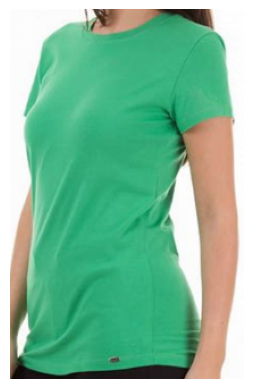

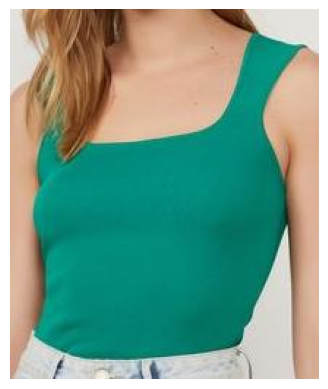

ID do produto: 52-15-1376-09255
Similaridade de cosseno: 0.8990610241889954


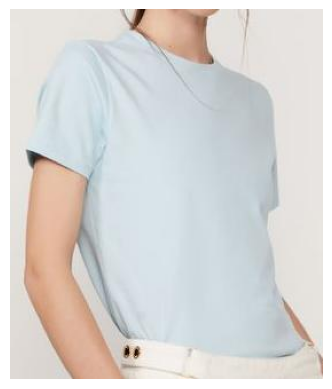

ID do produto: 52-06-0723-04331
Similaridade de cosseno: 0.8955707550048828


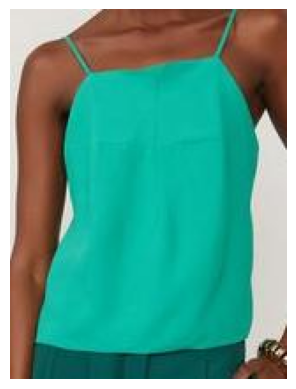

ID do produto: 52-10-5199-03344
Similaridade de cosseno: 0.8783977627754211


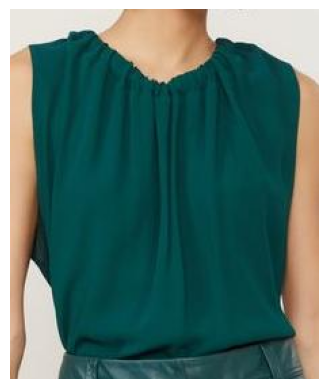

ID do produto: 52-13-5394-09253
Similaridade de cosseno: 0.8722943067550659


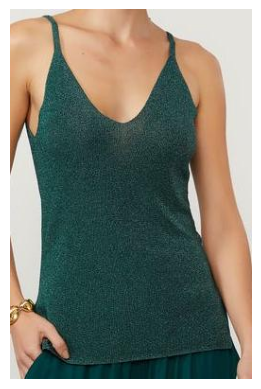

ID do produto: 52-15-1344-09253
Similaridade de cosseno: 0.871100664138794


In [279]:
# Load image teste_camiseta_verde.png
plot_image('teste_camiseta_verde_1.png')# Plotar as 5 imagens mais similares

for id in cos_sim_df.sort_values(by='cosine_similarity', ascending=False).head(5)['id_produto']:
    plot_image(sample_camisetas[sample_camisetas['id_produto'] == id]['file_path'].values[0])
    print(f"ID do produto: {id}")
    print(f"Similaridade de cosseno: {cos_sim_df[cos_sim_df['id_produto'] == id]['cosine_similarity'].values[0]}")


### Testando nas imagens preto e branco

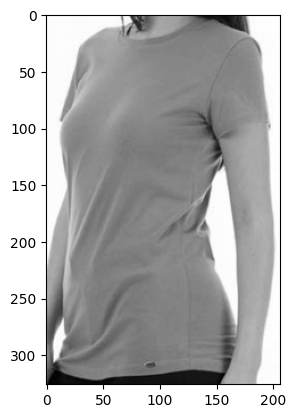

In [280]:
# Função que torna a imagem em preto e branco
def to_black_and_white(image_path):
    img = Image.open(image_path)
    img = img.convert('L')
    return img

# Exemplo de imagem em preto e branco
imagem_pb = to_black_and_white('teste_camiseta_verde_1.png')

plt.imshow(imagem_pb, cmap='gray')

In [281]:
# Lendo todas as imagens da pasta animale_images_cropped
import os

# Loop para ler todas as pastas e imagens
img_paths = []
for root, dirs, files in os.walk('animale_images_cropped'):
    for file in files:
        if file.endswith('.jpg'):
            img_paths.append(os.path.join(root, file))

# Criando um dataframe com os caminhos das imagens
df_img_paths = pd.DataFrame({'file_path': img_paths})

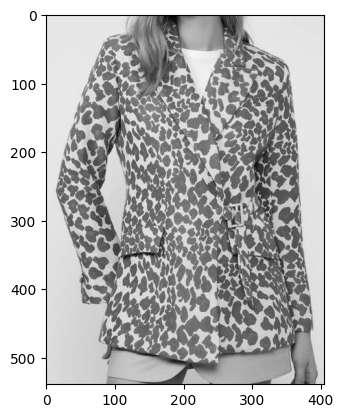

In [282]:
# Aplicando a função load_image para carregar as imagens

df_img_paths['img'] = df_img_paths['file_path'].apply(load_image)

# Aplicando a função desaturate_image para desaturar as imagens
df_img_paths['desaturated_img'] = df_img_paths['file_path'].apply(to_black_and_white)

# Plotando uma imagem desaturada
plt.imshow(df_img_paths['desaturated_img'].iloc[0], cmap='gray')

In [283]:
# Criando novo caminho para as imagens preto e branco: substituir 'animale_images_cropped' por 'animale_images_bw'
df_img_paths['file_path_bw'] = df_img_paths['file_path'].str.replace('animale_images_cropped', 'animale_images_bw')

df_img_paths['file_path_bw'].iloc[0]

'animale_images_bw\\blazer\\blazer_blazer-alfaiataria-est-onca-jacquard_bege_03-04-0464-0030.jpg'

In [284]:
df_img_paths.sample(3)

,file_path,img,desaturated_img,file_path_bw
158,animale_images_cropped\blusa\top-blusa_blusa-s...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=168x175 at ...,animale_images_bw\blusa\top-blusa_blusa-sem-al...
131,animale_images_cropped\blusa\top-blusa_blusa-d...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=242x479 at ...,animale_images_bw\blusa\top-blusa_blusa-de-tri...
101,animale_images_cropped\blusa\top-blusa_blusa-d...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=362x434 at ...,animale_images_bw\blusa\top-blusa_blusa-de-mal...


In [285]:
# Salvando as imagens em preto e branco no caminho correto
for i in range(len(df_img_paths)):
    path = df_img_paths['file_path_bw'].iloc[i]
    img = df_img_paths['desaturated_img'].iloc[i]
    img.save(path)

In [286]:
# Lendo quantas imagens foram salvas dentro das pastas blazer, blusa, calca, saia, short e vestido

dirs = ['blazer', 'blusa', 'calca', 'saia', 'short', 'vestido']

soma_dirs = 0

for dir in dirs:
    print(f"Imagens em {dir}: {len(os.listdir(f'animale_images_bw/{dir}'))}")
    soma_dirs += len(os.listdir(f'animale_images_bw/{dir}'))

print(f"Total de imagens: {soma_dirs}")


Imagens em blazer: 18
Imagens em blusa: 299
Imagens em calca: 165
Imagens em saia: 41
Imagens em short: 27
Imagens em vestido: 216
Total de imagens: 766


In [287]:
def get_img_embeddings(df, path_column, img_model):
  """
  Função que recebe um dataframe, a coluna que contém o caminho das imagens e o modelo de imagem
  Usa o modelo para conseguir os embeddings da imagem e salva no df
  """
  emb_columns = [f"emb_img_{i}" for i in range(512)]
  
  # Now we load and encode the images
  def load_image(url_or_path):
      if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
          return Image.open(requests.get(url_or_path, stream=True).raw)
      else:
          return Image.open(url_or_path)

  file_names = df[path_column].values
  images = [load_image(img) for img in file_names]
  img_embeddings = img_model.encode(images)

  # Colocando os embeddings no df
  emb_dict = {}
  for i, emb in enumerate(img_embeddings):
    emb_id = df.iloc[i]["id_produto"]
    emb_dict[emb_id] = emb

  df_embs = pd.DataFrame(emb_dict).T

  df_embs.columns = emb_columns
  df_embs["id_produto"] = df_embs.index

  return df_embs.reset_index(drop=True)[["id_produto"] + emb_columns]

In [288]:
df_img_paths.sample(3)

,file_path,img,desaturated_img,file_path_bw
129,animale_images_cropped\blusa\top-blusa_blusa-d...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=208x266 at ...,animale_images_bw\blusa\top-blusa_blusa-de-tri...
653,animale_images_cropped\vestido\vestido_vestido...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=243x593 at ...,animale_images_bw\vestido\vestido_vestido-de-g...
703,animale_images_cropped\vestido\vestido_vestido...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=158x464 at ...,animale_images_bw\vestido\vestido_vestido-de-t...


In [289]:
# Puxar id_produto para incluir em df_img_paths
df_aux = pd.read_parquet('datasets/base.parquet')

# Trocar a posição das barras em df_aux['file_path']
df_aux['file_path'] = df_aux['file_path'].str.replace('/', '\\')

df_img_paths = pd.merge(df_img_paths, df_aux[['file_path', 'id_produto']], on='file_path', how='right')

df_img_paths.sample(3)

,file_path,img,desaturated_img,file_path_bw,id_produto
254,animale_images_cropped\blusa\top-blusa_blusa-d...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=275x462 at ...,animale_images_bw\blusa\top-blusa_blusa-de-geo...,52-13-5326-09563
37,animale_images_cropped\calca\calca_calca-com-c...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=161x425 at ...,animale_images_bw\calca\calca_calca-com-cos-du...,25-34-1639-0030
210,animale_images_cropped\blusa\camisa_camisa-de-...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=399x358 at ...,animale_images_bw\blusa\camisa_camisa-de-trico...,52-05-1586-0201


In [290]:
df_img_paths.shape

(766, 5)

In [291]:
df_img_embs_bw = get_img_embeddings(df_img_paths[['id_produto', 'file_path_bw']], "file_path_bw", img_model)

In [292]:
df_img_embs_bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Columns: 513 entries, id_produto to emb_img_511
dtypes: float32(512), object(1)
memory usage: 1.5+ MB


In [293]:
df_img_embs_bw.sample(3)

,id_produto,emb_img_0,emb_img_1,emb_img_2,emb_img_3,emb_img_4,emb_img_5,emb_img_6,emb_img_7,emb_img_8,...,emb_img_502,emb_img_503,emb_img_504,emb_img_505,emb_img_506,emb_img_507,emb_img_508,emb_img_509,emb_img_510,emb_img_511
711,07-20-7013-09802,0.118939,0.110925,-0.204473,0.410274,-0.626950,0.627335,0.039738,-0.054607,0.419112,...,-0.207547,-0.334724,1.047033,-0.037619,-0.175416,-0.036145,0.223276,0.373037,-0.189406,0.317910
409,52-06-0648-09660,0.634938,0.165129,-0.514474,0.146725,-0.327264,0.041497,-0.543698,0.397160,0.812163,...,-0.123509,-0.134000,0.925175,0.200493,-0.153301,-0.368385,-0.104595,0.138431,-0.136367,0.482519
675,07-20-6744-00005,0.001845,0.149626,-0.193499,0.283251,-0.599045,0.069149,0.118492,-0.318841,0.547348,...,-0.152653,-0.072436,0.782930,0.080278,0.007540,-0.230861,-0.599739,0.569209,-0.278320,0.385531


In [294]:
# Pegando de df_img_paths os ids que foram samplados
sample_camisetas_bw = df_img_paths[df_img_paths['id_produto'].isin(sample_camisetas['id_produto'])]

In [295]:
sample_camisetas_bw = pd.merge(sample_camisetas_bw, df_img_embs_bw, on='id_produto', how='left')

sample_camisetas_bw.sample(3)

,file_path,img,desaturated_img,file_path_bw,id_produto,emb_img_0,emb_img_1,emb_img_2,emb_img_3,emb_img_4,...,emb_img_502,emb_img_503,emb_img_504,emb_img_505,emb_img_506,emb_img_507,emb_img_508,emb_img_509,emb_img_510,emb_img_511
5,animale_images_cropped\blusa\top-blusa_blusa-d...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=266x272 at ...,animale_images_bw\blusa\top-blusa_blusa-de-mal...,52-06-0688-09258,0.238687,0.291875,-0.059403,0.155394,-0.395643,...,-0.303345,-0.204491,1.116218,-0.229379,-0.214986,-0.393438,-0.172899,0.140851,0.040415,0.179400
9,animale_images_cropped\blusa\top-blusa_regata-...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=232x295 at ...,animale_images_bw\blusa\top-blusa_regata-de-tr...,52-15-1379-5476,-0.182654,0.111831,-0.326947,0.190023,-0.146537,...,-0.402061,-0.073312,0.403420,-0.374546,-0.166131,-0.318227,-1.017718,0.316863,0.097627,0.256453
0,animale_images_cropped\blusa\camisa_camisa-de-...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.Image.Image image mode=L size=343x336 at ...,animale_images_bw\blusa\camisa_camisa-de-seda-...,52-05-1571-5476,0.371635,0.351878,0.093161,0.306498,-0.292610,...,-0.166537,-0.055079,1.297116,0.254047,-0.431679,-0.215723,-0.102718,0.331619,0.113902,-0.068653


In [296]:
def get_cosine_similarity_bw(embedding):
    cos_sim = cosine_similarity([embedding], sample_camisetas_bw[emb_columns])
    cos_sim = cos_sim[0]
    cos_sim_df = pd.DataFrame({'id_produto': sample_camisetas_bw['id_produto'], 'cosine_similarity': cos_sim})
    return cos_sim_df

In [297]:
test_path = 'teste_camiseta_verde_1.png'

# Aplicar filtro preto e branco em img
img = to_black_and_white(test_path)

test_img_embedding_bw = img_model.encode(img)

In [298]:
# Comparando com as imagens de exemplo
cos_sim_df_bw = get_cosine_similarity_bw(test_img_embedding_bw)
cos_sim_df_bw

,id_produto,cosine_similarity
0,52-05-1571-5476,0.804693
1,03-06-0340-09254,0.784023
2,52-06-0723-04331,0.781693
3,52-13-5393-09258,0.947563
4,52-13-5394-09253,0.916373
5,52-06-0688-09258,0.843870
6,52-13-5563-04113,0.917204
7,52-06-0713-0005,0.786401
8,52-10-5199-03344,0.889580
9,52-15-1379-5476,0.715752


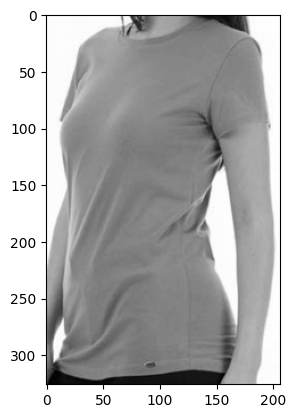

In [299]:
# Plotando imagem de teste(img)
plt.imshow(img, cmap='gray')

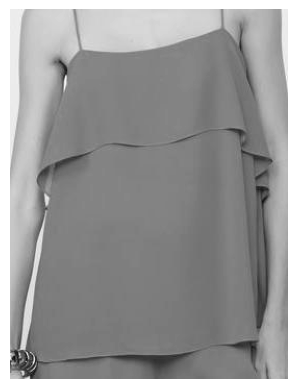

ID do produto: 52-13-5393-09258
Similaridade de cosseno: 0.9475634098052979


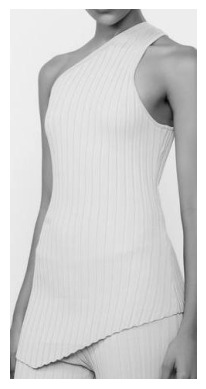

ID do produto: 52-13-5563-04113
Similaridade de cosseno: 0.9172044992446899


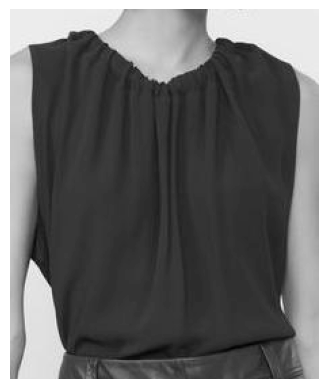

ID do produto: 52-13-5394-09253
Similaridade de cosseno: 0.9163727760314941


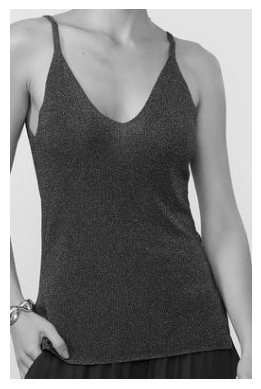

ID do produto: 52-15-1344-09253
Similaridade de cosseno: 0.8980438113212585


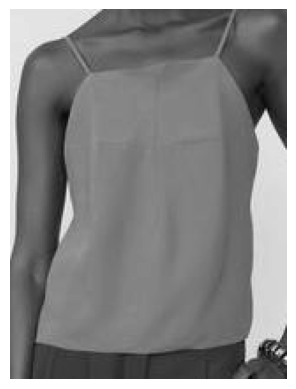

ID do produto: 52-10-5199-03344
Similaridade de cosseno: 0.8895795941352844


In [300]:
for id in cos_sim_df_bw.sort_values(by='cosine_similarity', ascending=False).head(5)['id_produto']:
    plot_image(sample_camisetas_bw[sample_camisetas_bw['id_produto'] == id]['file_path_bw'].values[0], cmap='gray')
    print(f"ID do produto: {id}")
    print(f"Similaridade de cosseno: {cos_sim_df_bw[cos_sim_df_bw['id_produto'] == id]['cosine_similarity'].values[0]}")
